<a href="https://colab.research.google.com/github/sofiane1987/Logging-Data-Visualization/blob/main/PioPetro_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print('Hello World')

Hello World


# Nouvelle section

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno


In [ ]:
file = "http://bit.ly/piopetro-data1"

In [ ]:
df = pd.read_csv(file)

In [ ]:
df.describe()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL
count,15349.000000,8980.000000,8980.000000,8980.000000,7890.000000,8919.000000,9155.000000,9146.00000,15340.000000,9161.000000,9161.000000,9161.000000,5706.000000
mean,19.994172,181.803870,77.162970,154.028791,14.856100,55.168534,45.377815,67.72844,11.441063,1095.638031,161049.063094,1672.152931,5315.479145
std,8.369911,109.712365,45.657949,76.752381,8.406821,36.692924,24.752635,27.71903,19.816930,1323.541545,188136.409296,1706.980951,2181.487231
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-458.000000,0.000000
25%,24.000000,0.000000,0.000000,83.665000,10.841250,18.952990,31.148000,56.57775,0.000000,191.000000,29431.000000,20.000000,4338.250000
50%,24.000000,232.897000,103.186500,175.589000,16.308500,52.096880,37.934000,80.07150,2.385000,558.000000,87750.000000,1098.000000,5504.500000
75%,24.000000,255.401250,106.277000,204.320000,21.306500,99.924290,57.101500,88.06200,13.765250,1345.000000,202482.000000,3261.000000,6780.750000
max,25.000000,397.589000,108.502000,345.907000,30.020000,100.000000,137.311000,93.51000,125.719000,5902.000000,851132.000000,8020.000000,10014.000000


In [ ]:
 df.head(10)

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND
0,07-Apr-14,15/9-F-1 C,0.0,0.000,0.000,0.000,0.0,0.00000,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
1,08-Apr-14,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,1.00306,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
2,09-Apr-14,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,0.97901,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
3,10-Apr-14,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,0.54576,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
4,11-Apr-14,15/9-F-1 C,0.0,310.376,96.876,277.278,0.0,1.21599,33.098,10.480,33.072,0.0,0.0,0.0,NaN,production
5,12-Apr-14,15/9-F-1 C,0.0,303.501,96.923,281.447,0.0,3.08702,22.053,8.704,22.053,0.0,0.0,0.0,NaN,production
6,13-Apr-14,15/9-F-1 C,0.0,303.535,96.959,276.032,0.0,1.96237,27.503,9.423,16.163,0.0,0.0,0.0,NaN,production
7,14-Apr-14,15/9-F-1 C,0.0,303.782,96.969,282.787,0.0,0.00000,20.996,8.131,20.737,0.0,0.0,0.0,NaN,production
8,15-Apr-14,15/9-F-1 C,0.0,303.858,97.021,289.941,0.0,31.14186,13.918,8.498,12.182,0.0,0.0,0.0,NaN,production
9,16-Apr-14,15/9-F-1 C,0.0,303.792,97.066,299.672,0.0,0.00000,4.120,8.821,1.490,0.0,0.0,0.0,NaN,production


In [ ]:
df["DAREPRD"] = pd.to_datetime(df['DATEPRD'], format = "%d-%b-%y")

In [ ]:
df

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,DAREPRD
0,07-Apr-14,15/9-F-1 C,0.0,0.000,0.000,0.000,0.000,0.00000,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production,2014-04-07
1,08-Apr-14,15/9-F-1 C,0.0,NaN,NaN,NaN,0.000,1.00306,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production,2014-04-08
2,09-Apr-14,15/9-F-1 C,0.0,NaN,NaN,NaN,0.000,0.97901,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production,2014-04-09
3,10-Apr-14,15/9-F-1 C,0.0,NaN,NaN,NaN,0.000,0.54576,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production,2014-04-10
4,11-Apr-14,15/9-F-1 C,0.0,310.376,96.876,277.278,0.000,1.21599,33.098,10.480,33.072,0.0,0.0,0.0,NaN,production,2014-04-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15629,14-Sep-16,15/9-F-5,0.0,NaN,NaN,NaN,0.273,0.63609,0.078,0.229,0.019,0.0,0.0,0.0,NaN,production,2016-09-14
15630,15-Sep-16,15/9-F-5,0.0,NaN,NaN,NaN,0.287,0.67079,0.085,0.229,0.006,0.0,0.0,0.0,NaN,production,2016-09-15
15631,16-Sep-16,15/9-F-5,0.0,NaN,NaN,NaN,0.286,0.66439,0.085,0.229,0.012,0.0,0.0,0.0,NaN,production,2016-09-16
15632,17-Sep-16,15/9-F-5,0.0,NaN,NaN,NaN,0.272,0.62466,0.075,0.228,0.026,0.0,0.0,0.0,NaN,production,2016-09-17


In [ ]:
print(df.columns)

Index(['DATEPRD', 'NPD_WELL_BORE_NAME', 'ON_STREAM_HRS',
       'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P',
       'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL',
       'BORE_WI_VOL', 'FLOW_KIND', 'DAREPRD'],
      dtype='object')


In [ ]:
print(df["NPD_WELL_BORE_NAME"].unique())

['15/9-F-1 C' '15/9-F-11' '15/9-F-12' '15/9-F-14' '15/9-F-15 D' '15/9-F-4'
 '15/9-F-5']


In [ ]:
mask = df['NPD_WELL_BORE_NAME'] == '15/9-F-14'

In [ ]:
well14 = df[mask]

In [ ]:
well14.tail(10)

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,DAREPRD
8013,08-Sep-16,15/9-F-14,0.0,0.0,0.0,10.876,10.583,1.07165,10.876,0.0,8.988,0.0,0.0,0.0,NaN,production,2016-09-08
8014,09-Sep-16,15/9-F-14,0.0,0.0,0.0,10.881,10.581,1.04806,10.881,0.0,8.976,0.0,0.0,0.0,NaN,production,2016-09-09
8015,10-Sep-16,15/9-F-14,0.0,0.0,0.0,10.878,10.579,1.11881,10.878,0.0,8.956,0.0,0.0,0.0,NaN,production,2016-09-10
8016,11-Sep-16,15/9-F-14,0.0,0.0,0.0,10.881,10.575,1.03097,10.881,0.0,8.955,0.0,0.0,0.0,NaN,production,2016-09-11
8017,12-Sep-16,15/9-F-14,0.0,0.0,0.0,10.877,10.579,0.98094,10.877,0.0,8.923,0.0,0.0,0.0,NaN,production,2016-09-12
8018,13-Sep-16,15/9-F-14,0.0,0.0,0.0,10.873,10.583,0.94937,10.873,0.0,8.894,0.0,0.0,0.0,NaN,production,2016-09-13
8019,14-Sep-16,15/9-F-14,0.0,0.0,0.0,10.877,10.583,1.11452,10.877,0.0,8.888,0.0,0.0,0.0,NaN,production,2016-09-14
8020,15-Sep-16,15/9-F-14,0.0,0.0,0.0,10.883,10.582,1.00047,10.883,0.0,8.856,0.0,0.0,0.0,NaN,production,2016-09-15
8021,16-Sep-16,15/9-F-14,0.0,0.0,0.0,10.879,10.583,1.16066,10.879,0.0,8.839,0.0,0.0,0.0,NaN,production,2016-09-16
8022,17-Sep-16,15/9-F-14,0.0,0.0,0.0,10.876,10.583,1.11322,10.876,0.0,8.828,0.0,0.0,0.0,NaN,production,2016-09-17


In [ ]:
#data anlysis maximum value

In [ ]:
well14.describe()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL
count,3056.000000,3050.000000,3050.000000,3050.000000,2533.000000,2860.000000,3056.000000,3056.000000,3056.000000,3056.000000,3056.000000,3056.000000,0.0
mean,20.541194,233.074651,95.133791,192.653088,10.527985,69.390287,41.530601,77.103033,15.435755,1290.009817,189139.247382,2330.245746,NaN
std,7.881136,64.923765,25.846814,57.736987,9.704603,31.064576,22.719575,25.615707,19.965158,1298.363790,184204.112292,1462.922870,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-59.000000,NaN
25%,24.000000,237.493000,99.621000,180.749500,0.000000,43.014158,31.020500,81.223500,2.665500,210.000000,31303.750000,695.500000,NaN
50%,24.000000,246.776000,101.007500,204.247500,12.969000,71.012955,33.546000,86.963500,7.177500,881.000000,142363.000000,2965.500000,NaN
75%,24.000000,261.971250,105.049000,229.632750,21.232000,100.000000,49.080250,88.539000,21.174000,2033.500000,305328.000000,3444.250000,NaN
max,25.000000,334.656000,106.773000,302.110000,26.682000,100.000000,125.719000,93.510000,125.719000,5644.000000,789975.000000,5692.000000,NaN


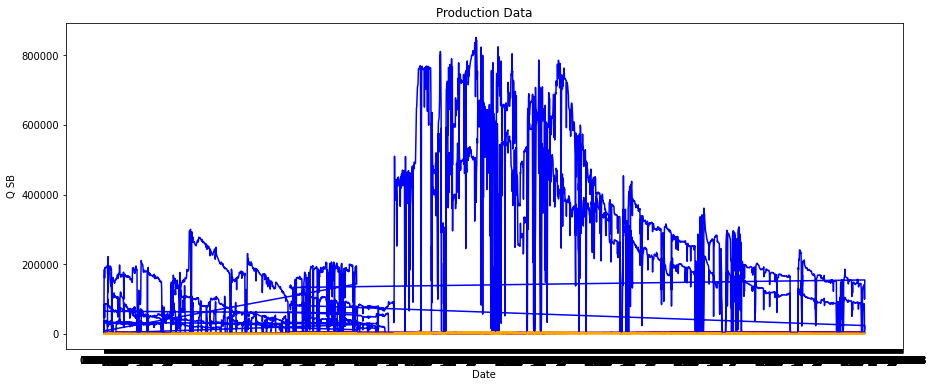

In [ ]:
plt.figure(figsize = (15,6))
plt.plot(df['DATEPRD'], df['BORE_WAT_VOL'], color = 'purple')
plt.title("Production Data")
plt.xlabel("Date");plt.ylabel("Q SB")
plt.plot(df['DATEPRD'], df['BORE_GAS_VOL'], color = 'blue')
plt.plot(df['DATEPRD'], df['BORE_OIL_VOL'], color = "orange")

In [ ]:
plt.show()

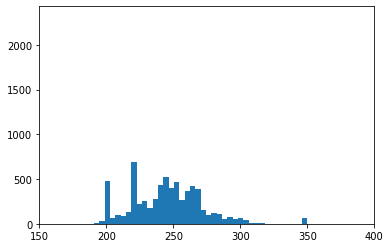

In [ ]:
plt.hist(df['AVG_DOWNHOLE_PRESSURE'],bins = 100)
plt.xlim(150,400)
plt.show()

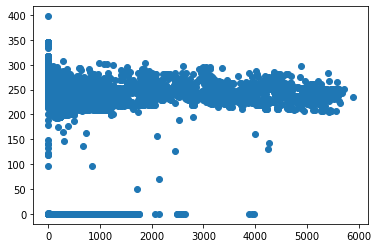

In [ ]:
plt.scatter(df["BORE_OIL_VOL"], df["AVG_DOWNHOLE_PRESSURE"])

In [ ]:
lists = ["ON_STREAM_HRS",  "BORE_OIL_VOL", "AVG_ANNULUS_PRESS"]
input = df[lists]


In [ ]:
input

,ON_STREAM_HRS,BORE_OIL_VOL,AVG_ANNULUS_PRESS
0,0.0,0.0,0.000
1,0.0,0.0,0.000
2,0.0,0.0,0.000
3,0.0,0.0,0.000
4,0.0,0.0,0.000
...,...,...,...
15629,0.0,0.0,0.273
15630,0.0,0.0,0.287
15631,0.0,0.0,0.286
15632,0.0,0.0,0.272


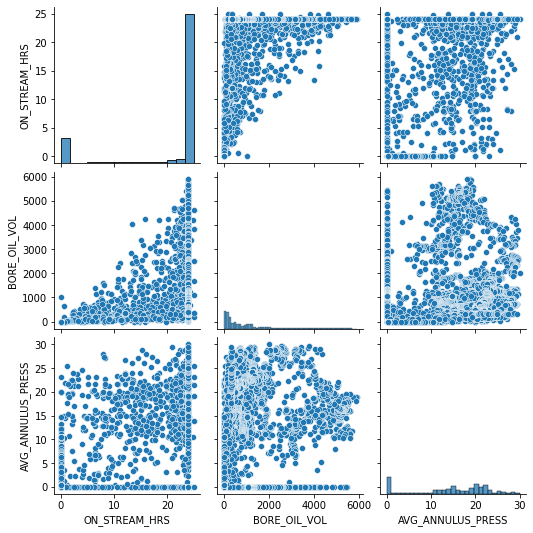

In [ ]:
sns.pairplot(input)

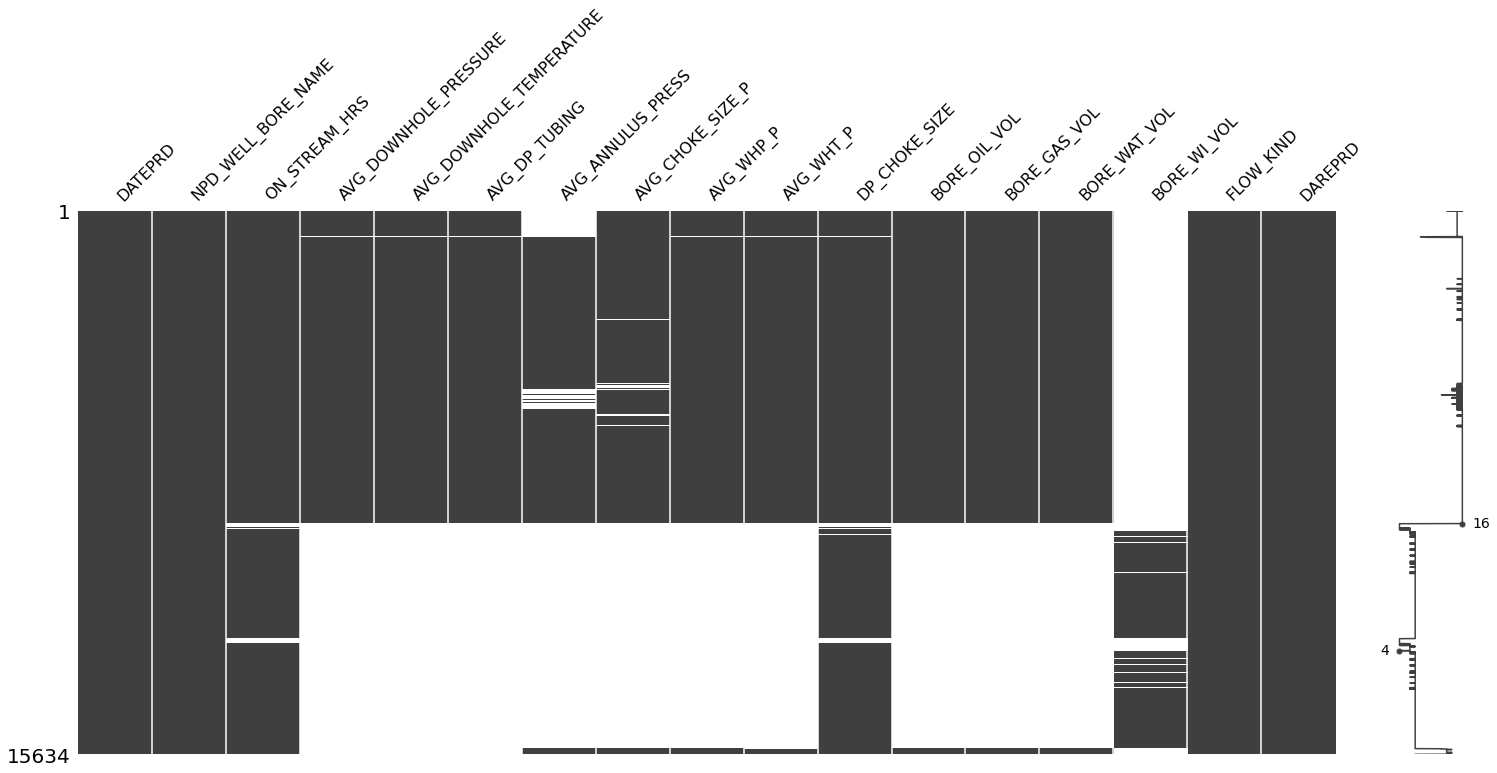

In [ ]:
msno.matrix(df)

In [ ]:
df = df.interpolate(method='linear')

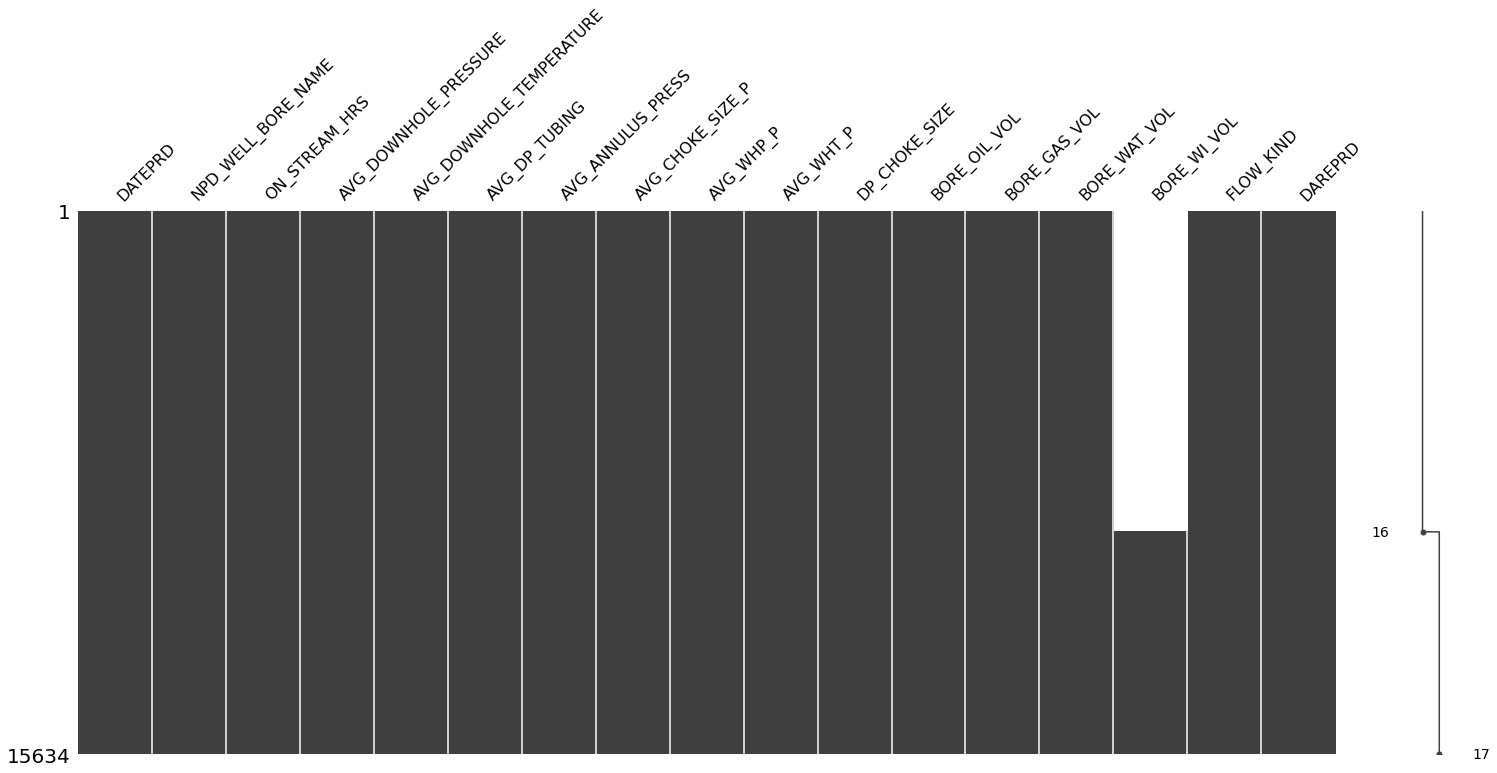

In [ ]:
msno.matrix(df)

In [ ]:
!pip install lasio


In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
import lasio  as ls

In [ ]:
!pip install mplstereonet

In [ ]:
!wget https://github.com/yohanesnuwara/formation-evaluation/blob/main/fracture.py


--2021-03-21 22:47:52--  https://github.com/yohanesnuwara/formation-evaluation/blob/main/fracture.py
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘fracture.py.1’

fracture.py.1           [ <=>                ] 123.35K   673KB/s    in 0.2s    

2021-03-21 22:47:53 (673 KB/s) - ‘fracture.py.1’ saved [126313]



Third session# Nouvelle section

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import mplstereonet as mls


In [ ]:
import Fracture  as frac


In [ ]:
well_path = "http://bit.ly/wireline-data"


In [ ]:
trajectory = 'http://bit.ly/trajectory-data'

In [ ]:
fracture_path = 'http://bit.ly/fractures-data'

In [ ]:
import lasio as ls


In [ ]:
well = ls.read(well_path)

NameError: ignored

In [ ]:
well.curves

[CurveItem(mnemonic="DEPT", unit="m", value="", descr="DEPTH", original_mnemonic="DEPT", data.shape=(21386,)),
 CurveItem(mnemonic="LITHOLOGY_GEOLINK", unit="_", value="", descr="Lithology_geolink", original_mnemonic="LITHOLOGY_GEOLINK", data.shape=(21386,)),
 CurveItem(mnemonic="CALI", unit="in", value="", descr="CALI", original_mnemonic="CALI", data.shape=(21386,)),
 CurveItem(mnemonic="DRHO", unit="g/cm3", value="", descr="DRHO", original_mnemonic="DRHO", data.shape=(21386,)),
 CurveItem(mnemonic="NPHI", unit="m3/m3", value="", descr="NPHI", original_mnemonic="NPHI", data.shape=(21386,)),
 CurveItem(mnemonic="RHOB", unit="g/cm3", value="", descr="RHOB", original_mnemonic="RHOB", data.shape=(21386,)),
 CurveItem(mnemonic="GR", unit="gAPI", value="", descr="GR", original_mnemonic="GR", data.shape=(21386,)),
 CurveItem(mnemonic="DTC", unit="us/ft", value="", descr="DTC", original_mnemonic="DTC", data.shape=(21386,)),
 CurveItem(mnemonic="DTE", unit="us/ft", value="", descr="DTE", origi

In [ ]:
well.data

array([[4.93493134e+02,            nan, 1.94060001e+01, ...,
        1.54602885e+00,            nan, 1.54602885e+00],
       [4.93645538e+02,            nan, 1.94060001e+01, ...,
        1.57003009e+00,            nan, 1.57003009e+00],
       [4.93797943e+02,            nan, 1.94060001e+01, ...,
        1.59499407e+00,            nan, 1.59499407e+00],
       ...,
       [3.75226196e+03,            nan, 7.55499983e+00, ...,
        3.15799999e+00,            nan, 3.15799999e+00],
       [3.75241431e+03,            nan, 7.55499983e+00, ...,
        3.15799999e+00,            nan, 3.15799999e+00],
       [3.75256665e+03,            nan, 7.55499983e+00, ...,
        3.15799999e+00,            nan, 3.15799999e+00]])

In [ ]:
well.curves

[CurveItem(mnemonic="DEPT", unit="m", value="", descr="DEPTH", original_mnemonic="DEPT", data.shape=(21386,)),
 CurveItem(mnemonic="LITHOLOGY_GEOLINK", unit="_", value="", descr="Lithology_geolink", original_mnemonic="LITHOLOGY_GEOLINK", data.shape=(21386,)),
 CurveItem(mnemonic="CALI", unit="in", value="", descr="CALI", original_mnemonic="CALI", data.shape=(21386,)),
 CurveItem(mnemonic="DRHO", unit="g/cm3", value="", descr="DRHO", original_mnemonic="DRHO", data.shape=(21386,)),
 CurveItem(mnemonic="NPHI", unit="m3/m3", value="", descr="NPHI", original_mnemonic="NPHI", data.shape=(21386,)),
 CurveItem(mnemonic="RHOB", unit="g/cm3", value="", descr="RHOB", original_mnemonic="RHOB", data.shape=(21386,)),
 CurveItem(mnemonic="GR", unit="gAPI", value="", descr="GR", original_mnemonic="GR", data.shape=(21386,)),
 CurveItem(mnemonic="DTC", unit="us/ft", value="", descr="DTC", original_mnemonic="DTC", data.shape=(21386,)),
 CurveItem(mnemonic="DTE", unit="us/ft", value="", descr="DTE", origi

In [ ]:
well.data

NameError: ignored

In [ ]:
new_well = well.df().reset_index()

NameError: ignored

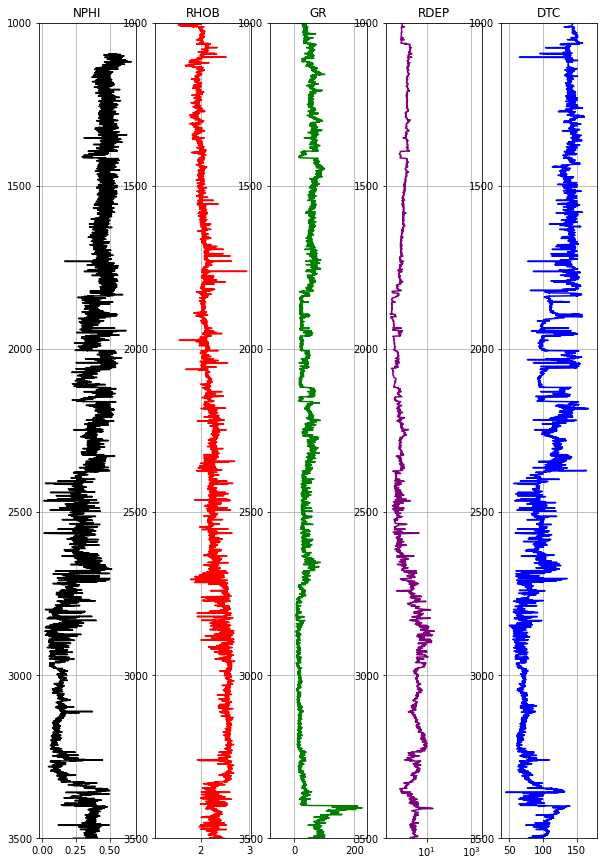

In [ ]:
#visualize well logs using for loop and subplots"NPHI , RHOB, GR , RDEP, DTC"
log = ['NPHI','RHOB' ,  'GR', 'RDEP', 'DTC']
color = ['black', 'red', 'green','purple', 'blue']

plt.figure(figsize = (10,15))
for i in range(5):
  plt.subplot(1,5, i+1)
  if log[i]=="RDEP":
    plt.semilogx(well[log[i]], well["DEPT"], color = color[i])
  else:
    plt.plot(well[log[i]], well["DEPT"], color = color[i])

  plt.ylim(3500,1000)
  plt.grid()
  plt.title(log[i])

plt.show()



In [ ]:
plt.show()

In [ ]:
#well bore trajectory

In [ ]:
traject_df = pd.read_csv(trajectory)

In [ ]:
traject_df.head(10
                )

,azi,md,tvd,incl,dispNs,dispEw,TVD_calc,surfNs,surfEw
0,0.00,0.0,0.0000,0.00,-3.1700,3.5300,0.000000,6.478560e+06,435053.550000
1,0.00,145.9,145.9000,0.00,-3.1700,3.5300,145.900000,6.478560e+06,435053.550000
2,253.69,153.4,153.4000,0.15,-3.1728,3.5206,153.399991,6.478560e+06,435053.540578
3,146.02,234.2,234.1996,0.28,-3.3662,3.5294,234.199630,6.478560e+06,435053.549412
4,136.21,274.6,274.5978,0.78,-3.6465,3.7749,274.597780,6.478560e+06,435053.794881
5,128.29,315.0,314.9898,1.46,-4.1640,4.3691,314.989847,6.478559e+06,435054.389145
6,124.07,355.3,355.2515,3.41,-5.1536,5.7651,355.251543,6.478558e+06,435055.785053
7,126.98,395.7,395.5379,5.13,-6.9133,8.2034,395.537936,6.478557e+06,435058.223387
8,139.07,436.1,435.7648,5.52,-9.4680,10.9194,435.764783,6.478554e+06,435060.939355
9,152.33,474.4,473.8855,5.62,-12.5207,12.9971,473.885535,6.478551e+06,435063.017149


# **This is the review of the third session**
















In [ ]:
!pip install lasio

In [ ]:
!pip install mplstereonet

In [ ]:
# Importing libraries

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import lasio

In [ ]:
import lasio as ls


In [ ]:
import mplstereonet as mpl

In [ ]:
import Fracture as frac

In [ ]:
#imoprting Data

In [ ]:
well_path = "http://bit.ly/wireline-data"


In [ ]:
fracture_path = 'http://bit.ly/fractures-data'

In [ ]:
trajectory = 'http://bit.ly/trajectory-data'

In [ ]:
well = lasio.read(well_path)

In [ ]:
well.curves

[CurveItem(mnemonic="DEPT", unit="m", value="", descr="DEPTH", original_mnemonic="DEPT", data.shape=(21386,)),
 CurveItem(mnemonic="LITHOLOGY_GEOLINK", unit="_", value="", descr="Lithology_geolink", original_mnemonic="LITHOLOGY_GEOLINK", data.shape=(21386,)),
 CurveItem(mnemonic="CALI", unit="in", value="", descr="CALI", original_mnemonic="CALI", data.shape=(21386,)),
 CurveItem(mnemonic="DRHO", unit="g/cm3", value="", descr="DRHO", original_mnemonic="DRHO", data.shape=(21386,)),
 CurveItem(mnemonic="NPHI", unit="m3/m3", value="", descr="NPHI", original_mnemonic="NPHI", data.shape=(21386,)),
 CurveItem(mnemonic="RHOB", unit="g/cm3", value="", descr="RHOB", original_mnemonic="RHOB", data.shape=(21386,)),
 CurveItem(mnemonic="GR", unit="gAPI", value="", descr="GR", original_mnemonic="GR", data.shape=(21386,)),
 CurveItem(mnemonic="DTC", unit="us/ft", value="", descr="DTC", original_mnemonic="DTC", data.shape=(21386,)),
 CurveItem(mnemonic="DTE", unit="us/ft", value="", descr="DTE", origi

In [ ]:
well.data

array([[4.93493134e+02,            nan, 1.94060001e+01, ...,
        1.54602885e+00,            nan, 1.54602885e+00],
       [4.93645538e+02,            nan, 1.94060001e+01, ...,
        1.57003009e+00,            nan, 1.57003009e+00],
       [4.93797943e+02,            nan, 1.94060001e+01, ...,
        1.59499407e+00,            nan, 1.59499407e+00],
       ...,
       [3.75226196e+03,            nan, 7.55499983e+00, ...,
        3.15799999e+00,            nan, 3.15799999e+00],
       [3.75241431e+03,            nan, 7.55499983e+00, ...,
        3.15799999e+00,            nan, 3.15799999e+00],
       [3.75256665e+03,            nan, 7.55499983e+00, ...,
        3.15799999e+00,            nan, 3.15799999e+00]])

In [ ]:
well.df().reset_index()

,DEPT,LITHOLOGY_GEOLINK,CALI,DRHO,NPHI,RHOB,GR,DTC,DTE,RDEP,SP,RSHA,RXO,RMED
0,493.493134,NaN,19.406000,-0.708,NaN,1.789,64.497482,167.582153,50815100.0,1.574993,0.694700,1.546029,NaN,1.546029
1,493.645538,NaN,19.406000,-0.722,NaN,1.754,62.406261,167.425064,50761636.0,1.569011,0.445339,1.570030,NaN,1.570030
2,493.797943,NaN,19.406000,-0.620,NaN,1.778,62.629055,167.808395,50886056.0,1.578010,0.727901,1.594994,NaN,1.594994
3,493.950348,NaN,19.452999,-0.648,NaN,1.642,65.998596,169.244873,51314492.0,1.586024,1.474898,1.589930,NaN,1.589930
4,494.102722,NaN,19.452999,-0.685,NaN,1.563,64.997223,170.635086,51763464.0,1.603011,-0.023000,1.540016,NaN,1.540016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21381,3751.957031,NaN,7.555000,0.085,0.13574,2.586,NaN,NaN,NaN,3.363003,70.302795,3.159997,NaN,3.159997
21382,3752.109375,NaN,7.555000,0.085,0.13574,2.586,NaN,NaN,NaN,3.364997,70.799194,3.158000,NaN,3.158000
21383,3752.261963,NaN,7.555000,0.085,0.13574,2.586,NaN,NaN,NaN,3.363006,71.544258,3.158000,NaN,3.158000
21384,3752.414307,NaN,7.555000,0.085,0.13574,2.586,NaN,NaN,NaN,3.364537,70.463211,3.158000,NaN,3.158000


In [ ]:
log =  ['NPHI','RHOB', 'GR', 'RDEP', 'DTC']

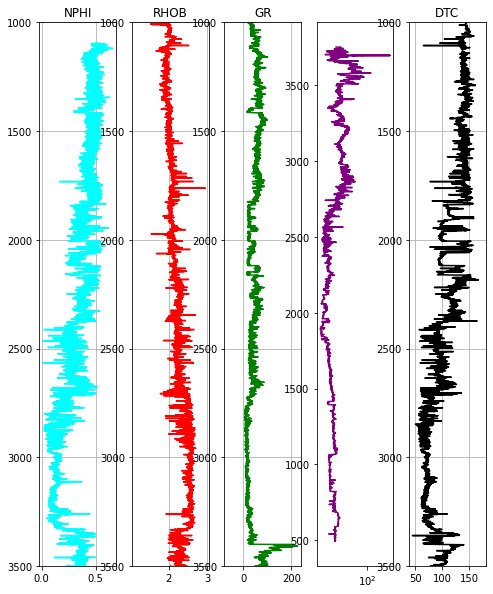

In [ ]:
color = ["cyan", 'red', 'green', 'purple' , 'black']
plt.figure(figsize = (8,10))
for i in range(5):
  plt.subplot(1,5,i+1)
  if log[i]== 'RDEP':
    plt.semilogx(well[log[i]], well['DEPT'], color = color[i])
  else:
    plt.plot(well[log[i]], well['DEPT'], color = color[i])
    plt.ylim(3500,1000)
    plt.grid()
    plt.title(log[i])
   
 
 
plt.show()

In [ ]:
#well bore trajectory equals to this visualization as shown in this picture below the code

In [ ]:
traject = pd.read_csv(trajectory)

In [ ]:
traject

,azi,md,tvd,incl,dispNs,dispEw,TVD_calc,surfNs,surfEw
0,0.00,0.0000,0.0000,0.00,-3.1700,3.5300,0.000000,6.478560e+06,435053.550000
1,0.00,145.9000,145.9000,0.00,-3.1700,3.5300,145.900000,6.478560e+06,435053.550000
2,253.69,153.4000,153.4000,0.15,-3.1728,3.5206,153.399991,6.478560e+06,435053.540578
3,146.02,234.2000,234.1996,0.28,-3.3662,3.5294,234.199630,6.478560e+06,435053.549412
4,136.21,274.6000,274.5978,0.78,-3.6465,3.7749,274.597780,6.478560e+06,435053.794881
...,...,...,...,...,...,...,...,...,...
109,107.51,4524.2000,3185.9439,77.65,201.7164,1449.4273,3185.943916,6.478765e+06,436499.447329
110,107.84,4564.9000,3193.8139,80.05,189.5929,1487.4710,3193.813855,6.478753e+06,436537.491089
111,108.48,4605.4030,3200.1182,82.04,177.1232,1525.4852,3200.118246,6.478741e+06,436575.505217
112,108.37,4645.7049,3205.6993,82.04,164.5080,1563.3527,3205.699325,6.478728e+06,436613.372759


In [ ]:
x = traject["surfEw"].values
y = traject['surfNs'].values
z= traject['tvd'].values

In [ ]:
import plotly.express as px

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
fig = px.scatter_3d(traject, x, y , z, color = "azi")
fig.update_scenes(zaxis_autorange = 'reversed')

In [ ]:
fig.show()

In [ ]:
fracture_path = 'http://bit.ly/fractures-data'
frac_df = pd.read_csv(fracture_path)

In [ ]:
frac_df

,depth,strike,dip,dip_direction,aperture
0,5200.824,228.25,76.41,318.25,4.31
1,5200.965,207.80,86.11,297.80,5.87
2,5205.068,233.97,84.07,323.97,7.22
3,5208.820,206.68,82.67,296.68,5.52
4,5221.970,214.65,77.20,304.65,5.44
5,5232.421,211.99,79.37,301.99,9.95
6,5248.538,214.61,79.88,304.61,12.24
7,5252.678,226.41,84.78,316.41,10.21
8,5269.203,245.50,80.63,335.50,8.22
9,5280.625,238.08,81.70,328.08,2.67


In [ ]:
strike = frac['strike'].values
dip = frac['dip'].values

TypeError: ignored

In [ ]:
frac.stereonet(strike, dip)

In [ ]:
frac.rose(strike)

# Final session , Decline curve






In [ ]:
path = 'http://bit.ly/piopetro-data1'

In [ ]:
!wget https://raw.githubusercontent.com/yohanesnuwara/pyreservoir/master/dca/dca.py

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from dca import arps_fit , remove_outlier

In [ ]:
df = pd.read_csv(path)

In [ ]:
df

In [ ]:
df['DAREPRD'] = pd.to_datetime(df["DATEPRD"], format = '%d-%b-y%')

In [ ]:
df 

In [ ]:
!wget https://raw.githubusercontent.com/yohanesnuwara/pyreservoir/master/dca/dca.py

In [ ]:
path = 'http://bit.ly/piopetro-data1'

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from dca import arps_fit , remove_outlier

ModuleNotFoundError: ignored

In [ ]:
df = pd.read_csv(path)

In [ ]:
df

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND
0,07-Apr-14,15/9-F-1 C,0.0,0.000,0.000,0.000,0.000,0.00000,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
1,08-Apr-14,15/9-F-1 C,0.0,NaN,NaN,NaN,0.000,1.00306,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
2,09-Apr-14,15/9-F-1 C,0.0,NaN,NaN,NaN,0.000,0.97901,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
3,10-Apr-14,15/9-F-1 C,0.0,NaN,NaN,NaN,0.000,0.54576,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
4,11-Apr-14,15/9-F-1 C,0.0,310.376,96.876,277.278,0.000,1.21599,33.098,10.480,33.072,0.0,0.0,0.0,NaN,production
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15629,14-Sep-16,15/9-F-5,0.0,NaN,NaN,NaN,0.273,0.63609,0.078,0.229,0.019,0.0,0.0,0.0,NaN,production
15630,15-Sep-16,15/9-F-5,0.0,NaN,NaN,NaN,0.287,0.67079,0.085,0.229,0.006,0.0,0.0,0.0,NaN,production
15631,16-Sep-16,15/9-F-5,0.0,NaN,NaN,NaN,0.286,0.66439,0.085,0.229,0.012,0.0,0.0,0.0,NaN,production
15632,17-Sep-16,15/9-F-5,0.0,NaN,NaN,NaN,0.272,0.62466,0.075,0.228,0.026,0.0,0.0,0.0,NaN,production


In [ ]:
df.head(10)

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND
0,07-Apr-14,15/9-F-1 C,0.0,0.000,0.000,0.000,0.0,0.00000,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
1,08-Apr-14,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,1.00306,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
2,09-Apr-14,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,0.97901,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
3,10-Apr-14,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,0.54576,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
4,11-Apr-14,15/9-F-1 C,0.0,310.376,96.876,277.278,0.0,1.21599,33.098,10.480,33.072,0.0,0.0,0.0,NaN,production
5,12-Apr-14,15/9-F-1 C,0.0,303.501,96.923,281.447,0.0,3.08702,22.053,8.704,22.053,0.0,0.0,0.0,NaN,production
6,13-Apr-14,15/9-F-1 C,0.0,303.535,96.959,276.032,0.0,1.96237,27.503,9.423,16.163,0.0,0.0,0.0,NaN,production
7,14-Apr-14,15/9-F-1 C,0.0,303.782,96.969,282.787,0.0,0.00000,20.996,8.131,20.737,0.0,0.0,0.0,NaN,production
8,15-Apr-14,15/9-F-1 C,0.0,303.858,97.021,289.941,0.0,31.14186,13.918,8.498,12.182,0.0,0.0,0.0,NaN,production
9,16-Apr-14,15/9-F-1 C,0.0,303.792,97.066,299.672,0.0,0.00000,4.120,8.821,1.490,0.0,0.0,0.0,NaN,production


In [ ]:
df['DATEPRD']= pd.to_datetime(df['DATEPRD'], format = "%d-%b-%y")

In [ ]:
df

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND
0,2014-04-07,15/9-F-1 C,0.0,0.000,0.000,0.000,0.000,0.00000,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
1,2014-04-08,15/9-F-1 C,0.0,NaN,NaN,NaN,0.000,1.00306,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
2,2014-04-09,15/9-F-1 C,0.0,NaN,NaN,NaN,0.000,0.97901,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
3,2014-04-10,15/9-F-1 C,0.0,NaN,NaN,NaN,0.000,0.54576,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
4,2014-04-11,15/9-F-1 C,0.0,310.376,96.876,277.278,0.000,1.21599,33.098,10.480,33.072,0.0,0.0,0.0,NaN,production
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15629,2016-09-14,15/9-F-5,0.0,NaN,NaN,NaN,0.273,0.63609,0.078,0.229,0.019,0.0,0.0,0.0,NaN,production
15630,2016-09-15,15/9-F-5,0.0,NaN,NaN,NaN,0.287,0.67079,0.085,0.229,0.006,0.0,0.0,0.0,NaN,production
15631,2016-09-16,15/9-F-5,0.0,NaN,NaN,NaN,0.286,0.66439,0.085,0.229,0.012,0.0,0.0,0.0,NaN,production
15632,2016-09-17,15/9-F-5,0.0,NaN,NaN,NaN,0.272,0.62466,0.075,0.228,0.026,0.0,0.0,0.0,NaN,production


In [ ]:
df.head(3)

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND
0,2014-04-07,15/9-F-1 C,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,production
1,2014-04-08,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,1.00306,0.0,0.0,0.0,0.0,0.0,0.0,NaN,production
2,2014-04-09,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,0.97901,0.0,0.0,0.0,0.0,0.0,0.0,NaN,production


In [ ]:
mask = df['NPD_WELL_BORE_NAME'] == '15/9-F-14'

In [ ]:
df2 = df[mask].reset_index()

In [ ]:
df2 = df2[['DATEPRD','BORE_OIL_VOL']] 

In [ ]:
df2

,DATEPRD,BORE_OIL_VOL
0,2008-02-12,0.0
1,2008-02-13,0.0
2,2008-02-14,0.0
3,2008-02-15,0.0
4,2008-02-16,0.0
...,...,...
3051,2016-09-13,0.0
3052,2016-09-14,0.0
3053,2016-09-15,0.0
3054,2016-09-16,0.0


In [ ]:
#plotting

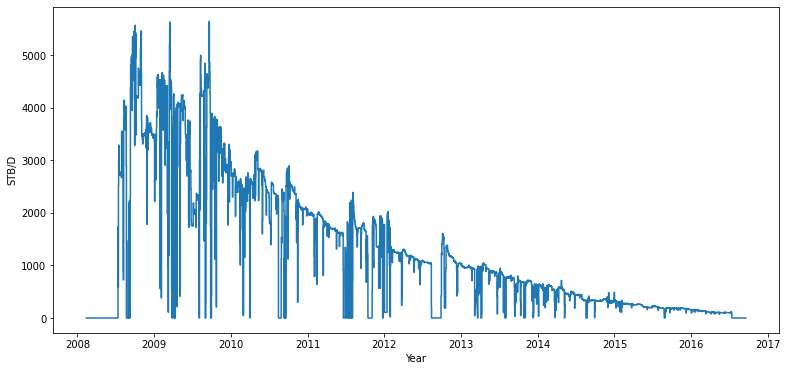

In [ ]:
plt.figure(figsize = (13,6))
plt.step(df2['DATEPRD'], df2['BORE_OIL_VOL'] )
plt.ylabel('STB/D'), plt.xlabel('Year')
plt.show()


In [1]:
!git

usage: git [--version] [--help] [-C <path>] [-c <name>=<value>]
           [--exec-path[=<path>]] [--html-path] [--man-path] [--info-path]
           [-p | --paginate | --no-pager] [--no-replace-objects] [--bare]
           [--git-dir=<path>] [--work-tree=<path>] [--namespace=<name>]
           <command> [<args>]

These are common Git commands used in various situations:

start a working area (see also: git help tutorial)
   clone      Clone a repository into a new directory
   init       Create an empty Git repository or reinitialize an existing one

work on the current change (see also: git help everyday)
   add        Add file contents to the index
   mv         Move or rename a file, a directory, or a symlink
   reset      Reset current HEAD to the specified state
   rm         Remove files from the working tree and from the index

examine the history and state (see also: git help revisions)
   bisect     Use binary search to find the commit that introduced a bug
   grep       Prin

In [3]:
!git init


Initialized empty Git repository in /content/.git/


In [4]:
! git commit -m "first commit"


*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@599f575e8765.(none)')


In [6]:
!git config --global user.email "bellabiod.sofiane@gmail.com"
! git config --global user.name "sofiane"

In [10]:
!git remote add origin https://github.com/sofiane1987/sofiane1987.git


In [14]:
!git remote -v

origin	https://github.com/sofiane1987/sofiane1987.git (fetch)
origin	https://github.com/sofiane1987/sofiane1987.git (push)


In [15]:
!git status

On branch master

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	.config/
	sample_data/

nothing added to commit but untracked files present (use "git add" to track)


In [17]:
!git add .

In [18]:
!git commit -m "again"

[master (root-commit) 7a8d1ee] again
 19 files changed, 50710 insertions(+)
 create mode 100644 .config/.last_opt_in_prompt.yaml
 create mode 100644 .config/.last_survey_prompt.yaml
 create mode 100644 .config/.last_update_check.json
 create mode 100644 .config/active_config
 create mode 100644 .config/config_sentinel
 create mode 100644 .config/configurations/config_default
 create mode 100644 .config/gce
 create mode 100644 .config/logs/2021.11.18/14.34.49.152157.log
 create mode 100644 .config/logs/2021.11.18/14.35.09.738473.log
 create mode 100644 .config/logs/2021.11.18/14.35.29.959577.log
 create mode 100644 .config/logs/2021.11.18/14.35.36.918574.log
 create mode 100644 .config/logs/2021.11.18/14.35.57.849518.log
 create mode 100644 .config/logs/2021.11.18/14.35.58.667492.log
 create mode 100755 sample_data/README.md
 create mode 100755 sample_data/anscombe.json
 create mode 100644 sample_data/california_housing_test.csv
 create mode 100644 sample_data/california_housing_train.c

In [19]:
!git push origin main

error: src refspec main does not match any.
error: failed to push some refs to 'https://github.com/sofiane1987/sofiane1987.git'
